In [1]:
from tdc.multi_pred import DTI

data = DTI("DAVIS", print_stats=True)

#help(data)

Found local copy...
Loading...
--- Dataset Statistics ---
68 unique drugs.
379 unique targets.
25772 drug-target pairs.
--------------------------
Done!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data.get_data()

df

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,10000.0
...,...,...,...,...,...
25767,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,10000.0
25768,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,10000.0
25769,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,1900.0
25770,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,4400.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25772 entries, 0 to 25771
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drug_ID    25772 non-null  int64  
 1   Drug       25772 non-null  object 
 2   Target_ID  25772 non-null  object 
 3   Target     25772 non-null  object 
 4   Y          25772 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1006.8+ KB


In [6]:
df.describe()

,Drug_ID,Y
count,2.577200e+04,25772.000000
mean,1.037657e+07,7558.112997
std,1.020455e+07,3990.013578
min,5.291000e+03,0.016000
25%,3.038524e+06,3775.000000
50%,1.000406e+07,10000.000000
75%,1.165936e+07,10000.000000
max,5.100435e+07,10000.000000


1. Distribution of Affinity Values (Y):

This plot reveals the spread of binding affinities in your dataset. You can use a histogram or a KDE plot:

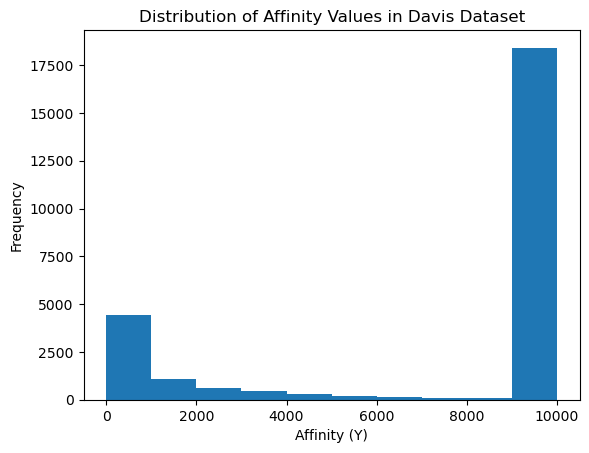

In [20]:
# Assuming 'Y' represents affinity values
plt.hist(df['Y'])
plt.xlabel('Affinity (Y)')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity Values in Davis Dataset')
plt.show()

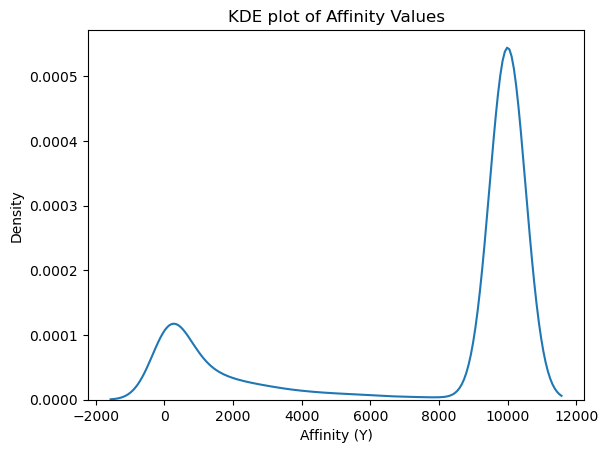

In [21]:
# For Kernel Density Estimation (KDE) plot
sns.kdeplot(df['Y'])  # Using seaborn for KDE plot
plt.xlabel('Affinity (Y)')
plt.ylabel('Density')
plt.title('KDE plot of Affinity Values')
plt.show()

2. Drug Counts per Target:

This plot explores the number of drugs interacting with each target protein. It can reveal potential biases or sparsity:

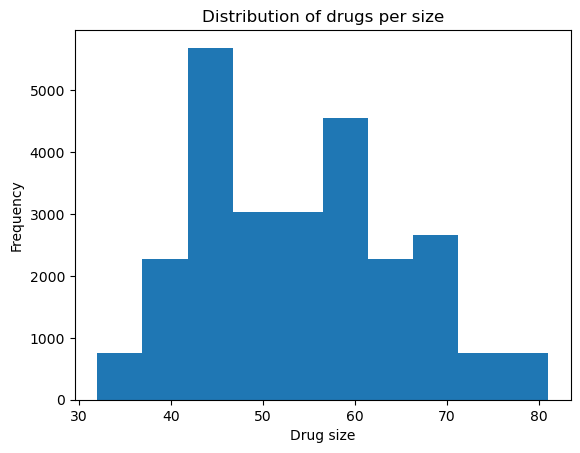

In [36]:
# Assuming 'Target_ID' is your identifier for targets
target_counts = df['Drug'].apply(len)
target_counts.plot(kind='hist', title='Distribution of drugs per size')
plt.xlabel('Drug size')
plt.ylabel('Frequency')
plt.show()

3. Scatter Plot of Affinity (Y) vs. Target Sequence Length (if available):

This plot investigates the relationship between target protein sequence length and binding affinity:

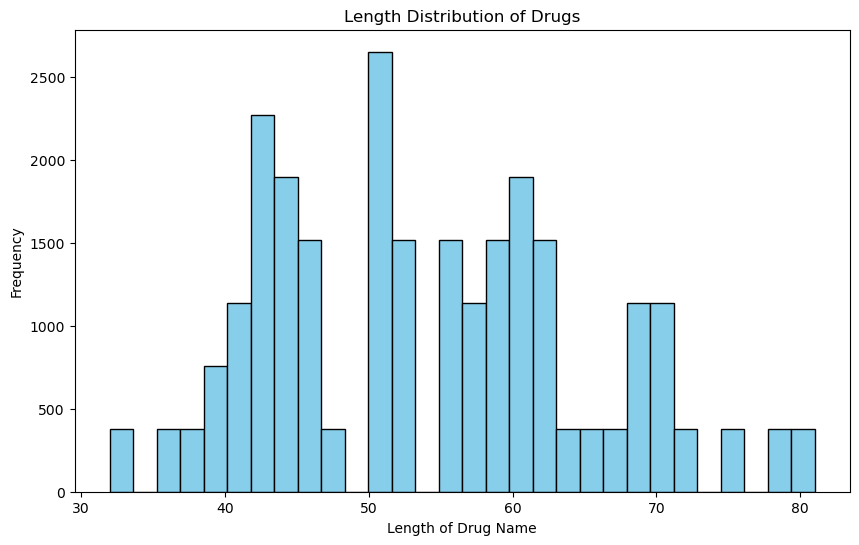

In [37]:
# Assuming 'df' is your DataFrame
df['Drug_length'] = df['Drug'].apply(len)

plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')
plt.show()

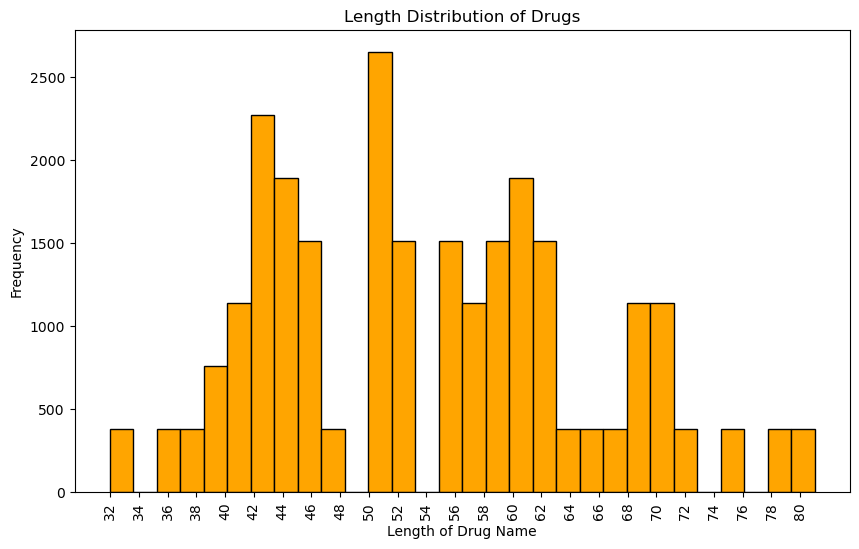

In [53]:
plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='orange', edgecolor='black')  # Increase the number of bins to 100
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')

# Set xticks to have more labels on x-axis
xticks = range(min(df['Drug_length']), max(df['Drug_length'])+1, 2)
plt.xticks(xticks, rotation=90)

plt.show()

In [ ]:
# Assuming you have a column for 'Target_Length'
plt.scatter(df['Target_Length'], df['Y'])
plt.xlabel('Target Sequence Length')
plt.ylabel('Affinity (Y)')
plt.title('Affinity vs. Target Sequence Length')
plt.show()

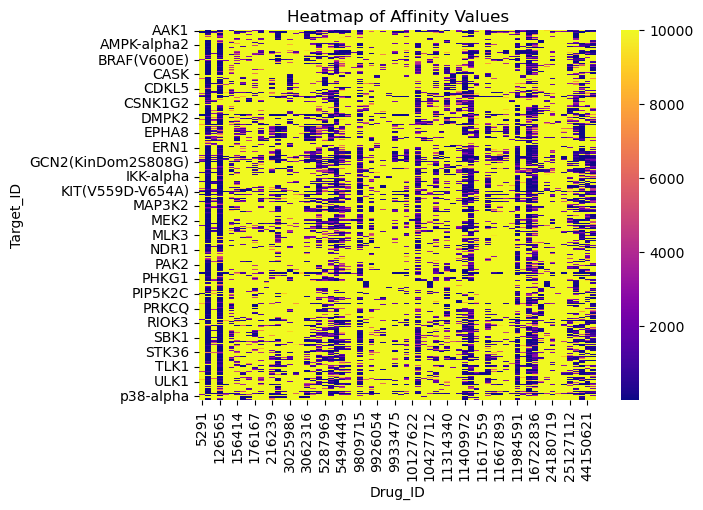

In [24]:
# Assuming 'Drug_ID' and 'Target_ID' are for rows and columns
pivot_table = pd.pivot_table(df, values='Y', index='Target_ID', columns='Drug_ID')
sns.heatmap(pivot_table, cmap='plasma')  # Using seaborn for heatmap
plt.title('Heatmap of Affinity Values')
plt.show()